### Importanto bibliotecas 

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [22]:
X, y = load_iris(return_X_y=True)

### Verificando as labels

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Separando os dados de treino e de teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, train_size=0.1, stratify=y)

### Treinando o classificador Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
classifier = LogisticRegression(random_state=0, multi_class='auto', solver='lbfgs').fit(X_train, y_train)

In [28]:
y_predicted = classifier.predict(X_test)

### Implementação das medidas de relatório 

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [30]:
def accuracy(y_predicted):
  return np.sum(np.diagonal(y_predicted)) / np.sum(y_predicted)

def precision(y_predicted):
  return y_predicted[0, 0] / np.sum(y_predicted[:, 0])

def recall(y_predicted):
  return y_predicted[0, 0] / np.sum(y_predicted[0, :])

def f1_measure(y_predicted):
  precision_val = precision(y_predicted)
  recall_val = recall(y_predicted)
  return 2 * ((precision_val * recall_val) / (precision_val + recall_val))



In [31]:
confu_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted)
confu_matrix

array([[45,  0,  0],
       [ 0, 36,  9],
       [ 0,  9, 36]])

In [32]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.80      0.80      0.80        45
           2       0.80      0.80      0.80        45

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135



In [33]:
print("Accuracy:", accuracy(confu_matrix))
print("Precision:", precision(confu_matrix))
print("Recall:", recall(confu_matrix))
print("F1-score:", f1_measure(confu_matrix))


Accuracy: 0.8666666666666667
Precision: 1.0
Recall: 1.0
F1-score: 1.0


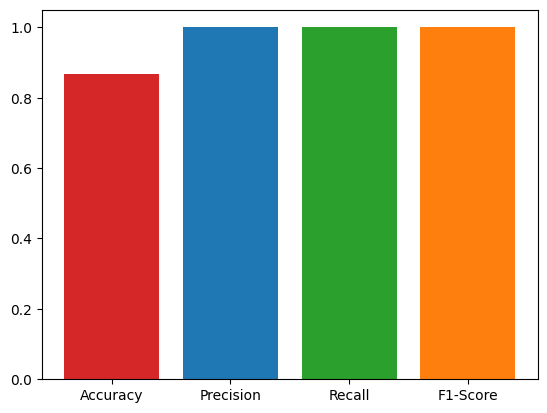

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

report_arr = [
  accuracy(confu_matrix),
  precision(confu_matrix),
  recall(confu_matrix),
  f1_measure(confu_matrix)
]

x_label = ["Accuracy", "Precision", "Recall", "F1-Score"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(x_label, report_arr, label=x_label, color=bar_colors)
plt.show()

### Desenhando a curva ROC para a classe iris-virginica

In [35]:
y_score = classifier.predict_proba(X_test)

In [36]:
from sklearn.preprocessing import LabelBinarizer

label_bin = LabelBinarizer().fit(y_train)
y_onehot_test = label_bin.transform(y_test)
y_onehot_test.shape

(135, 3)

In [37]:
# Selecionando apenas o conjunto virginica

label_bin.transform([2])

array([[0, 0, 1]])

In [38]:
class_of_interest = 2
class_id = np.flatnonzero(label_bin.classes_ == class_of_interest)[0]
class_id

2

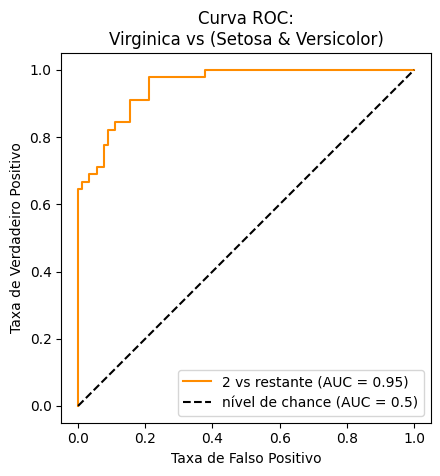

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs restante",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="nível de chance (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.title("Curva ROC:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

### Calculando a métrica AUC (Area Under Curve) para a classe virginica

In [40]:
micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

micro_roc_auc_ovr

0.9763511659807956